In [ ]:
# Question :- 
# In this assignment candidate will be able to create a model that can detect coronavirus patients 
# from X-ray reports

# Just info:-
# I have already download and unzip the kaggle dataset. It's name is Covid19-dataset.

In [23]:
# Importing all the necessary libraries

import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [2]:
train_dir = "C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/train"
test_dir = "C:/IA_SEM_3/TCS_Sem_3_IA1_IA2/TCS_Sem-3/IA_2/Covid19-dataset/test"

In [3]:
os.listdir(train_dir)

['Covid', 'Normal', 'Viral Pneumonia']

In [4]:
x_train = []
for folder in os.listdir(train_dir):
    sub_path = train_dir + '/' + folder
    for image in os.listdir(sub_path):
        img_path = sub_path + '/' + image
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224)) # Resnet-50 needs an input of shape 224x224
        x_train.append(img)

In [5]:
len(x_train)

251

In [6]:
# Total number of images in all the directories:- 
111 + 70 + 70

251

In [7]:
x_test = []
for folder in os.listdir(test_dir):
    sub_test = test_dir + '/' + folder
    for image in os.listdir(sub_test):
        img_test = sub_test + '/' + image
        imgtest = cv2.imread(img_test)
        imgtest = cv2.resize(imgtest,(224,224))
        x_test.append(imgtest)

In [8]:
len(x_test)

66

In [9]:
26 + 20 + 20

66

In [12]:
print("Maximum value of the first image in x_train", float(np.max(x_train[0])))
print("Minimum value of the first image in x_train", float(np.min(x_train[0])))

print("Maximum value of the first image in x_test", float(np.max(x_test[0])))
print("Minimum value of the first image in x_test", float(np.min(x_test[0])))


Maximum value of the first image in x_train 255.0
Minimum value of the first image in x_train 0.0
Maximum value of the first image in x_test 255.0
Minimum value of the first image in x_test 0.0


In [13]:
# Preprocessing the x_train and x_test

train = np.array(x_train)/255.0
test = np.array(x_test)/255.0

In [15]:
# But why there is a need for ImageDataGenerator? is the images are less. yes!

train_data = ImageDataGenerator(rescale = 1/255.0 , validation_split=0.2)
test_data = ImageDataGenerator(rescale = 1/255.0)

In [16]:
train_set = train_data.flow_from_directory(
                    train_dir,
                    subset = 'training',
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)
val_set = train_data.flow_from_directory(
                    train_dir,
                    subset = 'validation',
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)
test_set = test_data.flow_from_directory(
                    test_dir,
                    batch_size=32,
                    target_size=(224,224),
                    class_mode = 'sparse'
)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [17]:
y_train = train_set.classes 
y_val = val_set.classes
y_test = test_set.classes 
print(train_set.class_indices)
print("y_train :-", y_train)
print("y_val :- ", y_val)
print("y_test :- ", y_test)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
y_train :- [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
y_val :-  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
y_test :-  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
print('train data shape : ' , train.shape) # (Total number of images, height, width, colour channel)
print('test data shape : ' , test.shape)

train data shape :  (251, 224, 224, 3)
test data shape :  (66, 224, 224, 3)


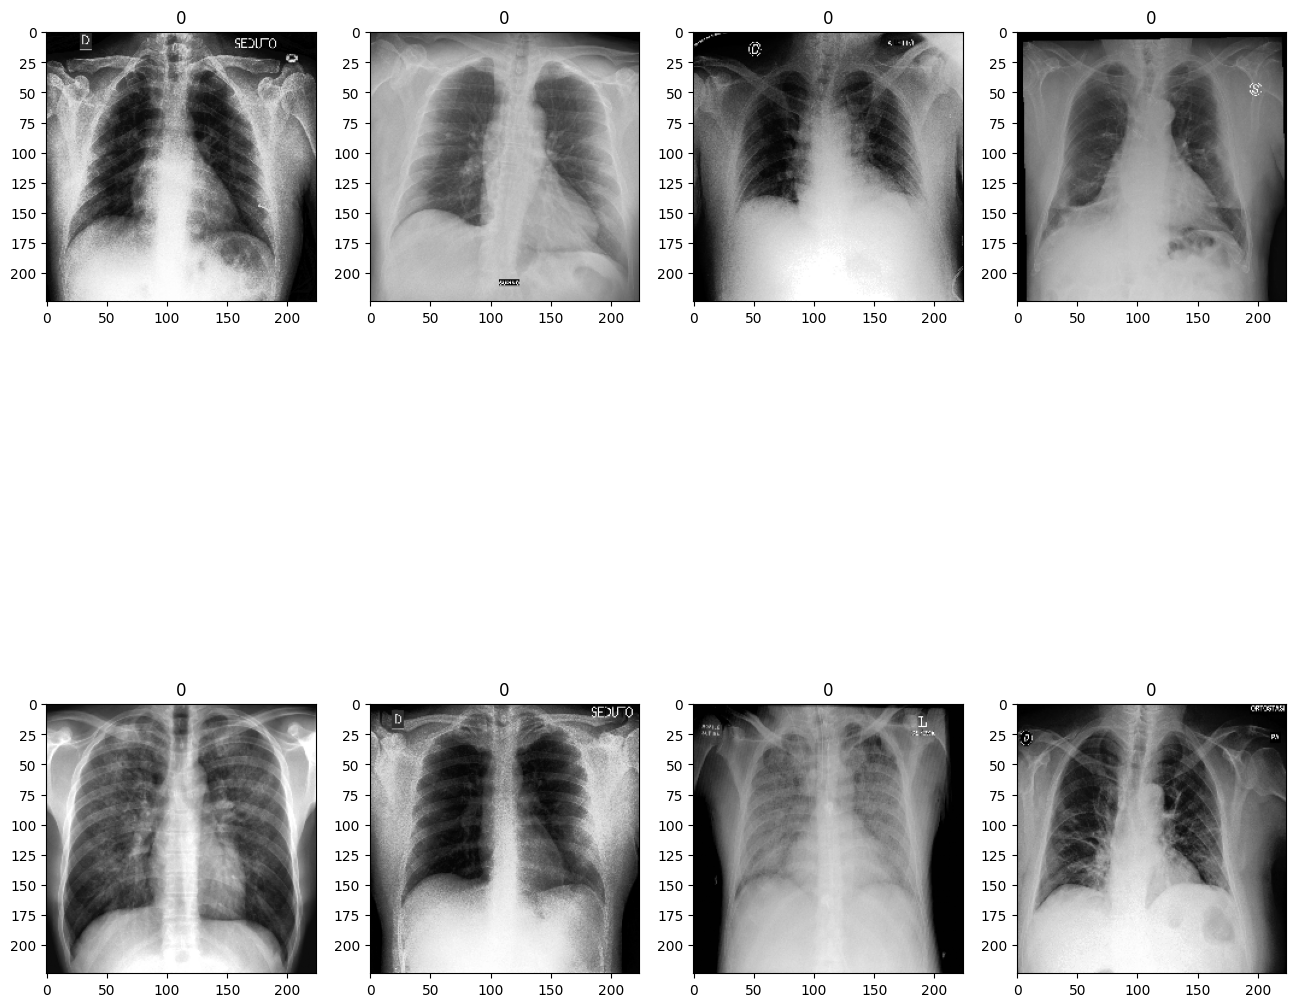

In [20]:
plt.figure(figsize=(16,16))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(train[i])
    plt.title(y_train[i])

In [22]:
# ResNet50 model tanser learning

vgg = ResNet50(include_top = False , input_shape = (224,224,3), weights='imagenet')
for layer in vgg.layers :
    layer.trainable = False

In [24]:


ES = EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    verbose = 0
)
model = Sequential([
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(factor=0.2),
    vgg,
    layers.Flatten(),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [25]:
# Fitting the model

training = model.fit_generator(
    train_set,
    callbacks=[ES],
    steps_per_epoch = 7 ,
    epochs = 5, # 100
    validation_data = val_set
)

C:\Users\admin\AppData\Local\Temp\ipykernel_13096\4039061785.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(


Epoch 1/5
7/7 [==============================] - 37s 5s/step - loss: 5.0899 - accuracy: 0.3831 - val_loss: 2.9271 - val_accuracy: 0.4400
Epoch 2/5
7/7 [==============================] - 30s 4s/step - loss: 2.2097 - accuracy: 0.5423 - val_loss: 3.1595 - val_accuracy: 0.6400
Epoch 3/5
7/7 [==============================] - 30s 4s/step - loss: 1.9268 - accuracy: 0.5821 - val_loss: 0.9932 - val_accuracy: 0.5800
Epoch 4/5
7/7 [==============================] - 35s 5s/step - loss: 1.0224 - accuracy: 0.6567 - val_loss: 0.7722 - val_accuracy: 0.5800
Epoch 5/5
7/7 [==============================] - 30s 4s/step - loss: 1.1257 - accuracy: 0.6219 - val_loss: 1.1656 - val_accuracy: 0.5600


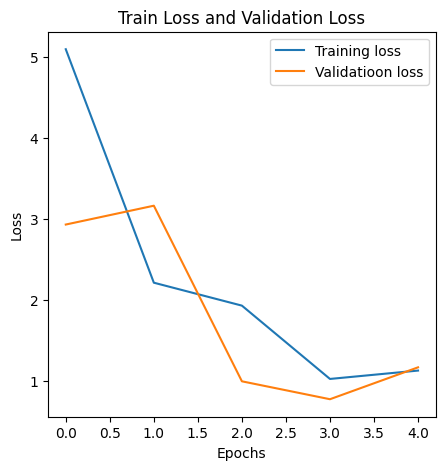

In [28]:
# Plotting the training loss (loss) and validation loss (val_loss)

plt.figure(figsize = (5, 5))
plt.plot(training.history["loss"], label = "Training loss")
plt.plot(training.history["val_loss"], label = "Validation loss")
plt.title("Train Loss and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validatioon loss"], loc = "upper right")
plt.show()

In [29]:
# prediction

pred = model.predict(test_set)
final_pred = np.argmax(pred, axis = 1)

3/3 [==============================] - 9s 2s/step


In [30]:
final_pred

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2],
      dtype=int64)